In [39]:
%matplotlib inline

# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Zammato API key
from config import gkey

In [40]:
# Variables used to extract data for Denver dataframe
target_city = "305"   # city_id for Denver
target_search = "55"  # cuisine_id for Italian
target_radius = 80    # in meters, about .05 miles

# set up a parameters dictionary
params = {
    "apikey": gkey,
    "start": 0,
    "city_id": target_city,
    "radius": target_radius,
    "cuisines": target_search,
    "sort": "rating", "cost"
    "order": "desc",
    "count": 20
}

# base url
base_url = "https://developers.zomato.com/api/v2.1/search"

#  using params dictionary
response = requests.get(base_url, params=params)
print(response.url)


https://developers.zomato.com/api/v2.1/search?apikey=f4188a23e764bfe4d12ed1e1b1ef9571&start=0&city_id=305&radius=80&cuisines=55&sort=rating&costorder=desc&count=20


In [41]:
# convert response to json
places_data = response.json()

# Print the json (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))  

{
    "restaurants": [
        {
            "restaurant": {
                "R": {
                    "has_menu_status": {
                        "delivery": -1,
                        "takeaway": -1
                    },
                    "res_id": 16973071
                },
                "all_reviews": {
                    "reviews": [
                        {
                            "review": {
                                "comments_count": 0,
                                "id": 38638419,
                                "likes": 0,
                                "rating": 4,
                                "rating_color": "5BA829",
                                "rating_text": "Great!",
                                "review_text": "My favorite thing about this place was the Fig & Cheese Pizza. It was crazy tasty. Figs, goat cheese and truffle oil. Perfect combo on a great dough. Tasted other items that were also good. Did not really like the burrata though."

In [42]:
resp = requests.get(base_url, params).json()

In [43]:
# Function populates list with dictionaries of api data used in Denver Italian DataFrame

def get_restaurant(resp, canonical_food_type): 
    rows = []
    for i in resp.get("restaurants"):
        q = i.get("restaurant").get("location").get("city")
        target_search = i.get("restaurant").get("cuisines")
        name = i.get("restaurant").get("name")
        review = i.get("restaurant").get("user_rating").get("aggregate_rating")
        price = i.get("restaurant").get("average_cost_for_two")
        rows.append({
#           "Food_Type": target_search, This data returned multiple data values including Italian, consolidated 
            #under Ultimate_Food_Type as Italian
            "Ultimate_Food_Type": canonical_food_type,
            "Restaurant": name,
            "Rating": review,
            "City": q,
            "Price": price
            
        })
        
    return rows


In [44]:
#Create Denver top 20 restaurant Italian dataframe sorted by rating

Den_Ital = pd.DataFrame.from_records(get_restaurant(resp, "Italian"))
Den_Ital.sort_values(by = ["Rating"], ascending= True, inplace = True)
Den_Ital.at[11,'Restaurant'] = 'Maggiano Little Italy'  #Rename duplicate restaurant name to represent unique data for each
Den_Ital

,City,Price,Rating,Restaurant,Ultimate_Food_Type
19,Denver,25,4.2,Armando's Ristorante Italiano,Italian
18,Denver,40,4.2,Cucina Colore,Italian
17,Denver,10,4.3,Lil Ricci's Pizza,Italian
16,Denver,25,4.3,North Italia,Italian
15,Denver,25,4.3,Virgilio's Pizzeria & Wine Bar,Italian
14,Denver,50,4.4,Colore Italian Restaurant & Pizzeria,Italian
13,Denver,25,4.4,Mellow Mushroom,Italian
12,Denver,80,4.4,Carmine's on Penn,Italian
11,Denver,40,4.4,Maggiano Little Italy,Italian
10,Denver,25,4.4,Trattoria Stella,Italian


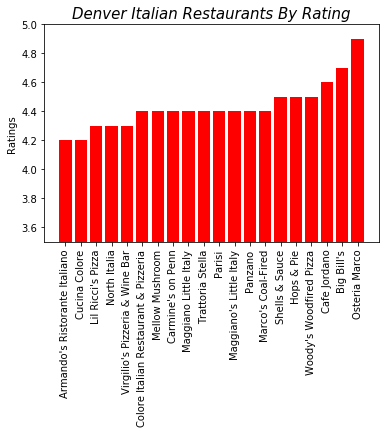

In [45]:
#Create bar chart representing top 20 Denver Italian restaurant's ratings

y_axis = Den_Ital["Rating"].astype(float)
x_axis = Den_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center")  #IMPORTANT
plt.xticks(x_axis.unique(), Den_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Ratings")
plt.title("Denver Italian Restaurants By Rating", fontsize=15, fontweight=0, style='italic' )
plt.ylim(bottom=3.5, top=5)
plt.savefig("Den_Ital_Rating.png", bbox_inches='tight', pd_inches=.5)


In [46]:
#Create Denver top 20 Italian restaurants dataframe sorted by price

Den_Ital = pd.DataFrame.from_records(get_restaurant(resp, "Italian"))
Den_Ital.sort_values(by = ["Price"], ascending= True, inplace = True)
Den_Ital.at[11,'Restaurant'] = 'Maggiano Little Italy'
Den_Ital

,City,Price,Rating,Restaurant,Ultimate_Food_Type
1,Denver,10,4.7,Big Bill's,Italian
17,Denver,10,4.3,Lil Ricci's Pizza,Italian
0,Denver,25,4.9,Osteria Marco,Italian
16,Denver,25,4.3,North Italia,Italian
15,Denver,25,4.3,Virgilio's Pizzeria & Wine Bar,Italian
13,Denver,25,4.4,Mellow Mushroom,Italian
10,Denver,25,4.4,Trattoria Stella,Italian
8,Denver,25,4.4,Marco's Coal-Fired,Italian
9,Denver,25,4.4,Parisi,Italian
5,Denver,25,4.5,Shells & Sauce,Italian


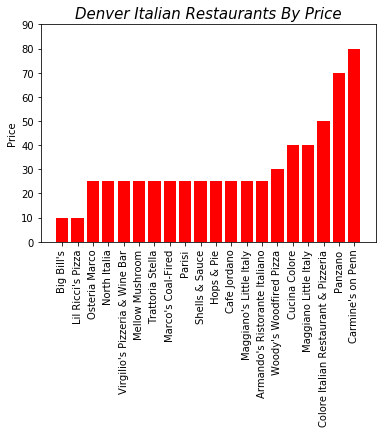

In [47]:
#Create bar chart representing top 20 Denver Italian restaurant's prices

y_axis = Den_Ital["Price"].astype(float)
x_axis = Den_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center") 
plt.xticks(x_axis.unique(), Den_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Price")
plt.title("Denver Italian Restaurants By Price", fontsize=15, fontweight=0, style='italic' )

plt.ylim(bottom=0, top=90)
plt.savefig("Den_Ital_Price.png", bbox_inches='tight', pd_inches=.5)

In [48]:
# Variables used to extract data for Colorado Springs dataframe

target_city_CS = "529" # city_id for Denver
target_search = "55"   # cuisine_id for Italian
target_radius = 80     # in meters, about .05 miles


# set up a parameters dictionary
params_CS = {
    "apikey": gkey,
    "start": 0,
    "city_id": target_city_CS,
    "radius": target_radius,
    "cuisines": target_search,
    "sort": "rating", "cost"
    "order": "desc",
    "count": 20
}

# base url
base_url = "https://developers.zomato.com/api/v2.1/search"

# run a request using our params dictionary
response_CS = requests.get(base_url, params=params_CS)
print(response_CS.url)


https://developers.zomato.com/api/v2.1/search?apikey=f4188a23e764bfe4d12ed1e1b1ef9571&start=0&city_id=529&radius=80&cuisines=55&sort=rating&costorder=desc&count=20


In [49]:
# convert response to json
places_data_CS = response_CS.json()

# Print the json (pretty printed)
print(json.dumps(places_data_CS, indent=4, sort_keys=True))  

{
    "restaurants": [
        {
            "restaurant": {
                "R": {
                    "has_menu_status": {
                        "delivery": -1,
                        "takeaway": -1
                    },
                    "res_id": 17324645
                },
                "all_reviews": {
                    "reviews": [
                        {
                            "review": {
                                "comments_count": 0,
                                "id": 35042846,
                                "likes": 0,
                                "rating": 1,
                                "rating_color": "CB202D",
                                "rating_text": "Avoid!",
                                "review_text": "Ordered a pizza for delivery, they said 30-45 minutes, took two hours. When we finally got it it was cold but at least when I opened the box, it smelled like cigarettes.",
                                "review_time_friendly": "M

In [50]:
resp_CS = requests.get(base_url, params_CS).json()

In [51]:
resp_CS

{'results_found': 180,
 'results_start': 0,
 'results_shown': 20,
 'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 17324645},
    'apikey': 'f4188a23e764bfe4d12ed1e1b1ef9571',
    'id': '17324645',
    'name': 'Borriello Brothers Real NY Pizza #1',
    'url': 'https://www.zomato.com/colorado-springs-co/borriello-brothers-real-ny-pizza-1-colorado-springs?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    'location': {'address': '215 E Platte Ave, Colorado Springs 80903',
     'locality': 'Colorado Springs',
     'city': 'Colorado Springs',
     'city_id': 529,
     'latitude': '38.8379150000',
     'longitude': '-104.8209930000',
     'zipcode': '80903',
     'country_id': 216,
     'locality_verbose': 'Colorado Springs, Colorado Springs'},
    'switch_to_order_menu': 0,
    'cuisines': 'Italian, Pizza, Sandwich',
    'timings': '11 AM to 9 PM (Mon-Thu),11 AM to 10 PM (Fri-Sat),12 Noon to 9 PM (Sun)',
    'ave

In [52]:
# Function populates list with dictionaries of api data used in Colorado Springs DataFrame

def get_restaurant(resp_CS, canonical_food_type): 
    rows = []
    for i in resp_CS.get("restaurants"):
        q = i.get("restaurant").get("location").get("city")
        target_search = i.get("restaurant").get("cuisines")
        name = i.get("restaurant").get("name")
        review = i.get("restaurant").get("user_rating").get("aggregate_rating")
        price = i.get("restaurant").get("average_cost_for_two")
        rows.append({
            "Ultimate_Food_Type": canonical_food_type,
            "Restaurant": name,
            "Rating": review,
            "City": q,
            "Price": price
            
        })
        
    return rows

In [53]:
#Create CO Springs top 20 Italian restaurants dataframe sorted by rating

CS_Ital = pd.DataFrame.from_records(get_restaurant(resp_CS, "Italian"))
CS_Ital.sort_values(by = ["Rating"], ascending= True, inplace = True)
CS_Ital

,City,Price,Rating,Restaurant,Ultimate_Food_Type
19,Colorado Springs,10,4.0,Roadrunner Pizza & Pasta,Italian
17,Colorado Springs,10,4.0,Paninos Restaurant,Italian
16,Colorado Springs,25,4.0,California Pizza Kitchen at Briargate,Italian
15,Colorado Springs,25,4.0,Billy's Old World Pizza and Italian Buffet,Italian
18,Colorado Springs,25,4.0,Bella Panini,Italian
14,Colorado Springs,10,4.1,Johnny's Navajo Hogan,Italian
13,Colorado Springs,25,4.1,Back East Bar & Grill,Italian
12,Colorado Springs,10,4.1,Duca's Neapolitan Pizza,Italian
11,Colorado Springs,40,4.1,La Bella Vita Ristorante Italiano,Italian
10,Colorado Springs,10,4.2,Panino's Restaurant,Italian


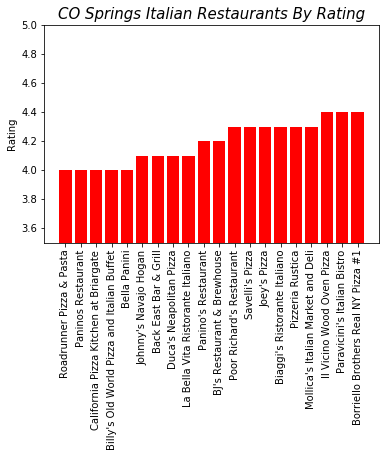

In [54]:
#Create bar chart representing top 20 Colorado Springs Italian restaurant's ratings

y_axis = CS_Ital["Rating"].astype(float)
x_axis = CS_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center") 
plt.xticks(x_axis.unique(), CS_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Rating")
plt.title("CO Springs Italian Restaurants By Rating", fontsize=15, fontweight=0, style='italic' )


plt.ylim(bottom=3.5, top=5)
plt.savefig("CS_Ital_Rating.png", bbox_inches='tight', pd_inches=.5)

In [55]:
#Create CO Springs top 20 Italian restaurant dataframe sorted by price

CS_Ital = pd.DataFrame.from_records(get_restaurant(resp_CS, "Italian"))
CS_Ital.sort_values(by = ["Price"], ascending= True, inplace = True)
CS_Ital.head()

,City,Price,Rating,Restaurant,Ultimate_Food_Type
0,Colorado Springs,10,4.4,Borriello Brothers Real NY Pizza #1,Italian
17,Colorado Springs,10,4.0,Paninos Restaurant,Italian
14,Colorado Springs,10,4.1,Johnny's Navajo Hogan,Italian
12,Colorado Springs,10,4.1,Duca's Neapolitan Pizza,Italian
10,Colorado Springs,10,4.2,Panino's Restaurant,Italian


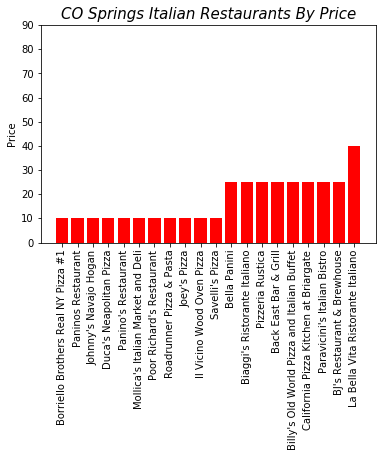

In [56]:
#Create bar chart representing top 20 Colorado Springs Italian restaurant's prices

y_axis = CS_Ital["Price"].astype(float)
x_axis = CS_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center") 
plt.xticks(x_axis.unique(), CS_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Price")
plt.title("CO Springs Italian Restaurants By Price", fontsize=15, fontweight=0, style='italic' )

plt.ylim(bottom=0, top=90)
plt.savefig("CS_Ital_Price.png", bbox_inches='tight', pd_inches=.5)

In [57]:
# Variables used to extract data for Northern CO dataframe
target_city_NoCo = "541" # city_id for Northern CO
target_search = "55"     # cuisine_id for Italian
target_radius = 80       # in meters, about .05 miles

# set up a parameters dictionary
params_NoCo = {
    "apikey": gkey,
    "start": 0,
    "city_id": target_city_NoCo,
    "radius": target_radius,
    "cuisines": target_search,
    "sort":  "rating", "cost"
    "order": "desc",
    "count": 20
}

# base url
base_url = "https://developers.zomato.com/api/v2.1/search"

# run a request using our params dictionary
response_NoCo = requests.get(base_url, params=params_NoCo)
print(response_NoCo.url)

https://developers.zomato.com/api/v2.1/search?apikey=f4188a23e764bfe4d12ed1e1b1ef9571&start=0&city_id=541&radius=80&cuisines=55&sort=rating&costorder=desc&count=20


In [58]:
# convert response to json
places_data_NoCo = response_NoCo.json()

# Print the json (pretty printed)
print(json.dumps(places_data_NoCo, indent=4, sort_keys=True))  

{
    "restaurants": [
        {
            "restaurant": {
                "R": {
                    "has_menu_status": {
                        "delivery": -1,
                        "takeaway": -1
                    },
                    "res_id": 17361103
                },
                "all_reviews": {
                    "reviews": [
                        {
                            "review": {
                                "comments_count": 0,
                                "id": 41958039,
                                "likes": 0,
                                "rating": 5,
                                "rating_color": "305D02",
                                "rating_text": "Insane!",
                                "review_text": "Good priced food and drink and polite staff. Live music at night and the Beatles Night was fully booked and tables reserved which made us unable to go.Even has Great Desserts!. The Mississippi Mudpie is great AND it is topped wit

In [59]:
resp_NoCo = requests.get(base_url, params_NoCo).json()

In [60]:
resp_NoCo

{'results_found': 159,
 'results_start': 0,
 'results_shown': 20,
 'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 17361103},
    'apikey': 'f4188a23e764bfe4d12ed1e1b1ef9571',
    'id': '17361103',
    'name': "Coopersmith's Pub & Brewing",
    'url': 'https://www.zomato.com/northern-colorado/coopersmiths-pub-brewing-fort-collins?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    'location': {'address': '5 Old Town Sq, Fort Collins 80524',
     'locality': 'Fort Collins',
     'city': 'Northern Colorado',
     'city_id': 541,
     'latitude': '40.5872800000',
     'longitude': '-105.0756572000',
     'zipcode': '80524',
     'country_id': 216,
     'locality_verbose': 'Fort Collins, Northern Colorado'},
    'switch_to_order_menu': 0,
    'cuisines': 'Burger, Pizza, Bar Food',
    'timings': '11 AM to 11 PM (Mon, Tue, Wed, Thu, Sun), 11 AM to 12 Midnight (Fri-Sat)',
    'average_cost_for_two': 25,
    'price_r

In [61]:
# Function populates list with dictionaries of api data used in Northern CO DataFrame

def get_restaurant(resp_NoCo, canonical_food_type): 
    rows = []
    for i in resp_NoCo.get("restaurants"):
        q = i.get("restaurant").get("location").get("city")
        target_search = i.get("restaurant").get("cuisines")
        name = i.get("restaurant").get("name")
        review = i.get("restaurant").get("user_rating").get("aggregate_rating")
        price = i.get("restaurant").get("average_cost_for_two")
        rows.append({
            "Ultimate_Food_Type": canonical_food_type,
            "Restaurant": name,
            "Rating": review,
            "City": q,
            "Price": price
            
        })

    return rows

In [62]:
#Create Northern CO top 20 Italian restaurant dataframe sorted by rating

NoCo_Ital = pd.DataFrame.from_records(get_restaurant(resp_NoCo, "Italian"))
NoCo_Ital.sort_values(by = ["Rating"], ascending= True, inplace = True)
NoCo_Ital

,City,Price,Rating,Restaurant,Ultimate_Food_Type
19,Northern Colorado,10,3.8,Cheesy Lee's Amazing Pizza,Italian
17,Northern Colorado,25,3.8,Pourhouse Bar and Grill,Italian
18,Northern Colorado,25,3.8,Biaggi's Ristorante Italiano,Italian
16,Northern Colorado,40,3.9,Domenics,Italian
15,Northern Colorado,25,3.9,Garlic Knot,Italian
14,Northern Colorado,25,3.9,Village Pizza,Italian
13,Northern Colorado,10,4.0,Santeramo's Pizza House and Italian Foods,Italian
12,Northern Colorado,10,4.0,Pulcinella Pizzeria,Italian
11,Northern Colorado,40,4.0,The Dunraven Inn,Italian
10,Northern Colorado,25,4.1,Mama Rose's,Italian


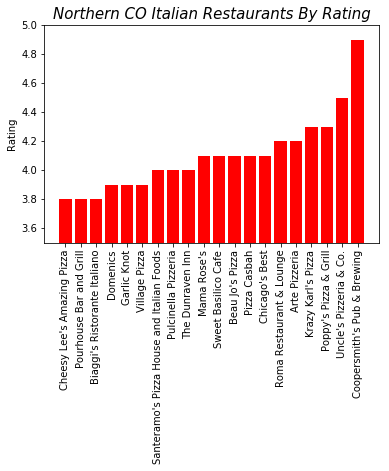

In [63]:
#Create bar chart representing top 20 Northern CO Italian restaurant's ratings

y_axis = NoCo_Ital["Rating"].astype(float)
x_axis = NoCo_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center") 
plt.xticks(x_axis.unique(), NoCo_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Rating")
plt.title("Northern CO Italian Restaurants By Rating", fontsize=15, fontweight=0, style='italic' )

plt.ylim(bottom=3.5, top=5)
plt.savefig("NoCo_Ital_Rating.png", bbox_inches='tight', pd_inches=.5)

In [64]:
#Create Northern CO top 20 Italian restaurant dataframe sorted by price

NoCo_Ital = pd.DataFrame.from_records(get_restaurant(resp_NoCo, "Italian"))
NoCo_Ital.sort_values(by = ["Price"], ascending= True, inplace = True)
NoCo_Ital.head()

,City,Price,Rating,Restaurant,Ultimate_Food_Type
19,Northern Colorado,10,3.8,Cheesy Lee's Amazing Pizza,Italian
3,Northern Colorado,10,4.3,Krazy Karl's Pizza,Italian
5,Northern Colorado,10,4.2,Roma Restaurant & Lounge,Italian
6,Northern Colorado,10,4.1,Pizza Casbah,Italian
13,Northern Colorado,10,4.0,Santeramo's Pizza House and Italian Foods,Italian


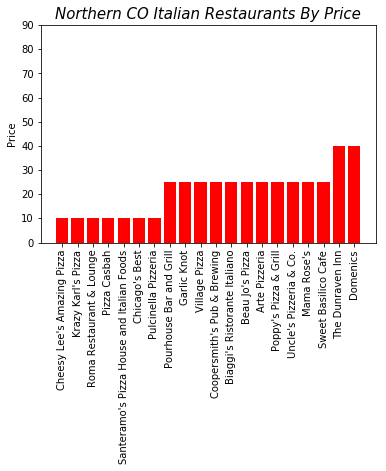

In [65]:
#Create bar chart representing top 20 Nothern CO Italian restaurant's prices

y_axis = NoCo_Ital["Price"].astype(float)
x_axis = NoCo_Ital["Restaurant"]

plt.bar(x_axis, y_axis, color='r', alpha=1, align="center")  #IMPORTANT
plt.xticks(x_axis.unique(), NoCo_Ital["Restaurant"].unique(), rotation='vertical')

plt.ylabel("Price")
plt.title("Northern CO Italian Restaurants By Price", fontsize=15, fontweight=0, style='italic' )


plt.ylim(bottom=0, top=90)
plt.savefig("NoCo_Ital_Price.png", bbox_inches='tight', pd_inches=.5)

In [66]:
#Combine three data frames

combine = pd.concat([Den_Ital,NoCo_Ital,CS_Ital], axis=0, join='outer')
combine.head()

,City,Price,Rating,Restaurant,Ultimate_Food_Type
1,Denver,10,4.7,Big Bill's,Italian
17,Denver,10,4.3,Lil Ricci's Pizza,Italian
0,Denver,25,4.9,Osteria Marco,Italian
16,Denver,25,4.3,North Italia,Italian
15,Denver,25,4.3,Virgilio's Pizzeria & Wine Bar,Italian


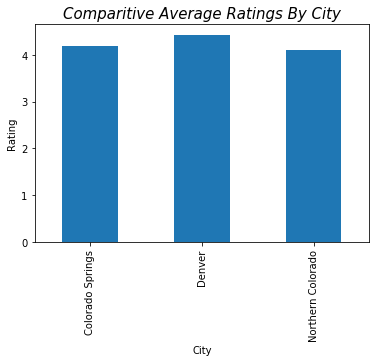

In [67]:
#Create bar chart comparing avg ratings between cities

combine["Rating"] = combine["Rating"].astype(float)

combine.groupby("City").agg({
    "Rating": "mean"
}).plot(legend=False, kind="bar")

plt.ylabel("Rating")
plt.title("Comparitive Average Ratings By City", fontsize=15, fontweight=0, style='italic' )

plt.savefig("City_Ital_Rating.png", bbox_inches='tight', pd_inches=.5)

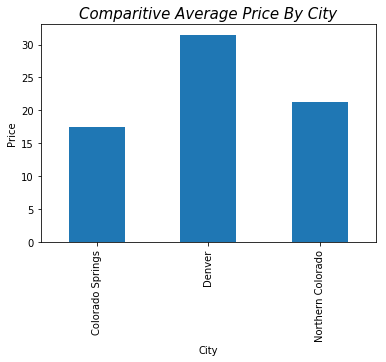

In [68]:
#Create bar chart comparing avg prices between cities

combine["Price"] = combine["Price"].astype(float)

combine.groupby("City").agg({
    "Price": "mean"
}).plot(legend=False,kind="bar")

plt.ylabel("Price")
plt.title("Comparitive Average Price By City", fontsize=15, fontweight=0, style='italic' )

plt.savefig("City_Ital_Price.png", bbox_inches='tight', pd_inches=.5)

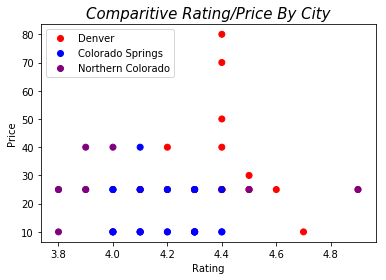

In [70]:
#Create Scatter Plot comparing rate to price by city

city_color = {"Denver": 'red', "Colorado Springs": "blue", "Northern Colorado":"purple" }

plt.scatter(combine['Rating'], combine['Price'], c=combine['City'].map(lambda x: city_color.get(x))  )

#Alternate 'legend'
# plt.text(4.7,76,"Cities:", fontweight='bold')
# plt.text(4.7,72,"Denver",color = 'red')
# plt.text(4.7,68,"CO Springs",color= 'blue')
# plt.text(4.7,64,"Northern CO",color = 'purple')

plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Comparitive Rating/Price By City", fontsize=15, fontweight=0, style='italic' )

markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in city_color.values()]
plt.legend(markers, city_color.keys(), numpoints=1, loc='upper left')

plt.savefig("City_RatingvsPrice.png", bbox_inches='tight', pd_inches=.5)
plt.show()